In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:

# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [4]:

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [6]:
df = pd.read_csv("reviews.csv")


In [7]:
df.shape

(114, 33)

In [8]:
dataset = df[['review_id' , 'author_id' ,'review_rating' ,'review_text']]

In [9]:
dataset.head()

,review_id,author_id,review_rating,review_text
0,ChdDSUhNMG9nS0VJQ0FnSURWNHNQMXJBRRAB,105375374821901363666,5,I used Empire quite a few times and its never ...
1,ChZDSUhNMG9nS0VJQ0FnSURGdFl2ZWJnEAE,114176802502974023828,5,My kids book me with empire cls when I come vi...
2,ChdDSUhNMG9nS0VJQ0FnSUNKenVTQ3FRRRAB,111394657426270535354,5,"Fantastic experience, my wife and I were stran..."
3,ChZDSUhNMG9nS0VJQ0FnSUQyM2JIYUp3EAE,117488888275175621943,5,Best service in the industry. I will never rid...
4,ChZDSUhNMG9nS0VJQ0FnSURoOGR5SktBEAE,107566500204803301096,5,I have now used this company twice and couldn'...


In [10]:
dataset.isnull().sum()

review_id         0
author_id         0
review_rating     0
review_text      47
dtype: int64

In [11]:
dataset.review_text.fillna(value = "", inplace = True)

<ipython-input-11-f9e7c3e960c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.review_text.fillna(value = "", inplace = True)


In [12]:
dataset.describe(include = "all")

,review_id,author_id,review_rating,review_text
count,114,114,114.000000,114
unique,114,114,NaN,68
top,ChdDSUhNMG9nS0VJQ0FnSURWNHNQMXJBRRAB,105375374821901363666,NaN,
freq,1,1,NaN,47
mean,NaN,NaN,4.166667,NaN
std,NaN,NaN,1.573659,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,5.000000,NaN
50%,NaN,NaN,5.000000,NaN
75%,NaN,NaN,5.000000,NaN


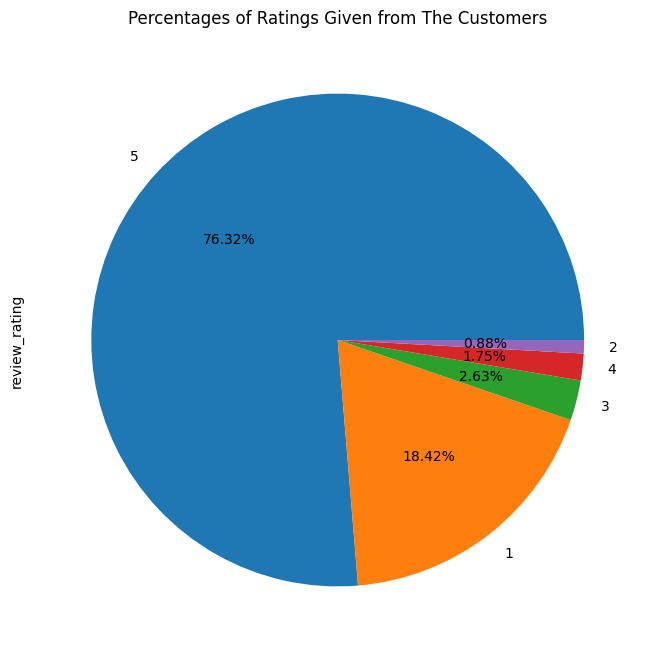

In [13]:
dataset.review_rating.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()


In [14]:
def Labelling(Rows):
  if(Rows["review_rating"] > 3.0):
    Label = "Positive"
  elif(Rows["review_rating"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [15]:
dataset["sentiment"] = dataset.apply(Labelling, axis = 1)

<ipython-input-15-86d6de7ce469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sentiment"] = dataset.apply(Labelling, axis = 1)


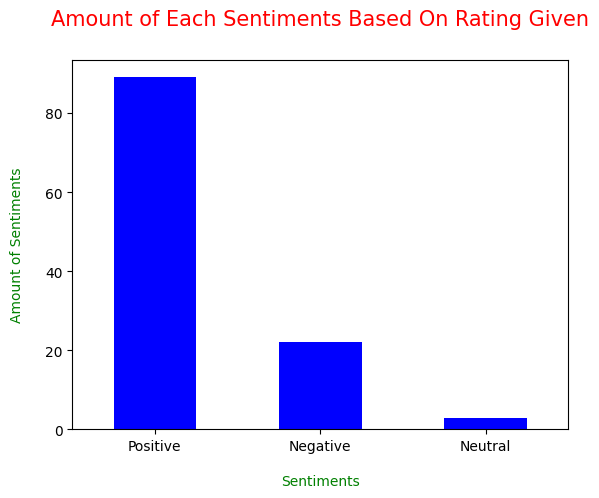

In [16]:
dataset["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [17]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [18]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()

  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)

  # Removing Stopwords and Lemmatizing Words
  # To reduce noises in our dataset, also to keep it simple and still
  # powerful, we will only omit the word `not` from the list of stopwords

  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [19]:
dataset["review_text"] = dataset["review_text"].apply(lambda Text: Text_Cleaning(Text))
dataset["review_text"] = dataset["review_text"].apply(lambda Text: Text_Processing(Text))

<ipython-input-19-f9fba1193f9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["review_text"] = dataset["review_text"].apply(lambda Text: Text_Cleaning(Text))
<ipython-input-19-f9fba1193f9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["review_text"] = dataset["review_text"].apply(lambda Text: Text_Processing(Text))


In [20]:
dataset.head(n = 10)

,review_id,author_id,review_rating,review_text,sentiment
0,ChdDSUhNMG9nS0VJQ0FnSURWNHNQMXJBRRAB,105375374821901363666,5,used empire quite time never anything amazing ...,Positive
1,ChZDSUhNMG9nS0VJQ0FnSURGdFl2ZWJnEAE,114176802502974023828,5,kid book empire cl come visit new jersey holid...,Positive
2,ChdDSUhNMG9nS0VJQ0FnSUNKenVTQ3FRRRAB,111394657426270535354,5,fantastic experience wife stranded newark weat...,Positive
3,ChZDSUhNMG9nS0VJQ0FnSUQyM2JIYUp3EAE,117488888275175621943,5,best service industry never ride anyone else e...,Positive
4,ChZDSUhNMG9nS0VJQ0FnSURoOGR5SktBEAE,107566500204803301096,5,used company twice happier first experience tr...,Positive
5,ChZDSUhNMG9nS0VJQ0FnSUR4MTRtc1B3EAE,110012748945714511371,5,wanted give team empire cl shout today— top br...,Positive
6,ChdDSUhNMG9nS0VJQ0FnSURoazVPbi1RRRAB,113599429406365217471,5,amazing experience riding inthe ground force a...,Positive
7,ChZDSUhNMG9nS0VJQ0FnSUNSaS0ydlVBEAE,102806529916549547904,1,hard pas international flight driver not show ...,Negative
8,ChdDSUhNMG9nS0VJQ0FnSURoOC12ZnVnRRAB,101656457127496278896,5,could not recommend empirecls highly rented sp...,Positive
9,ChZDSUhNMG9nS0VJQ0FnSUQtNF9YUUxnEAE,116267621562986815635,5,recent experience empirecls phenomenal took ca...,Positive


In [21]:
dataset.describe(include = "all")

,review_id,author_id,review_rating,review_text,sentiment
count,114,114,114.000000,114,114
unique,114,114,NaN,66,3
top,ChdDSUhNMG9nS0VJQ0FnSURWNHNQMXJBRRAB,105375374821901363666,NaN,,Positive
freq,1,1,NaN,47,89
mean,NaN,NaN,4.166667,NaN,NaN
std,NaN,NaN,1.573659,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,5.000000,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


In [22]:
dataset["polarity"] = dataset["review_text"].map(lambda Text: TextBlob(Text).sentiment.polarity)

<ipython-input-22-b6d11400b8f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["polarity"] = dataset["review_text"].map(lambda Text: TextBlob(Text).sentiment.polarity)


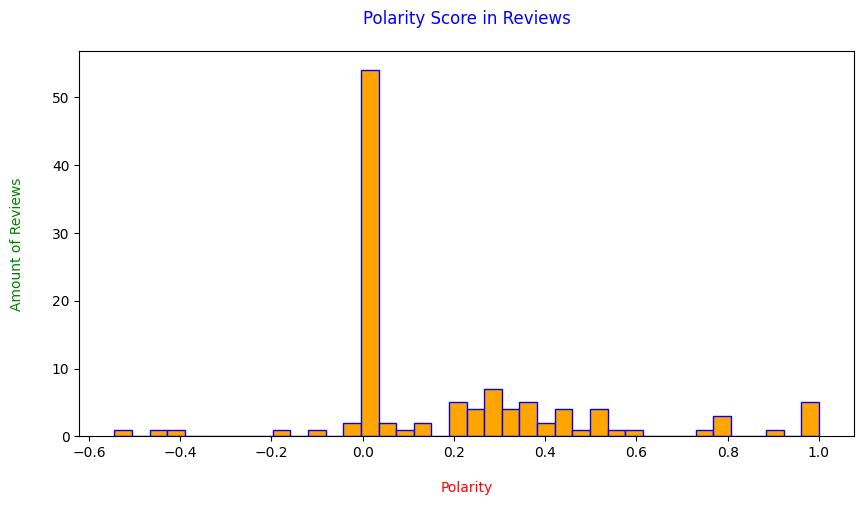

In [23]:
dataset["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [24]:
dataset["length"] = dataset["review_text"].astype(str).apply(len)

<ipython-input-24-0bdf037b14a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["length"] = dataset["review_text"].astype(str).apply(len)


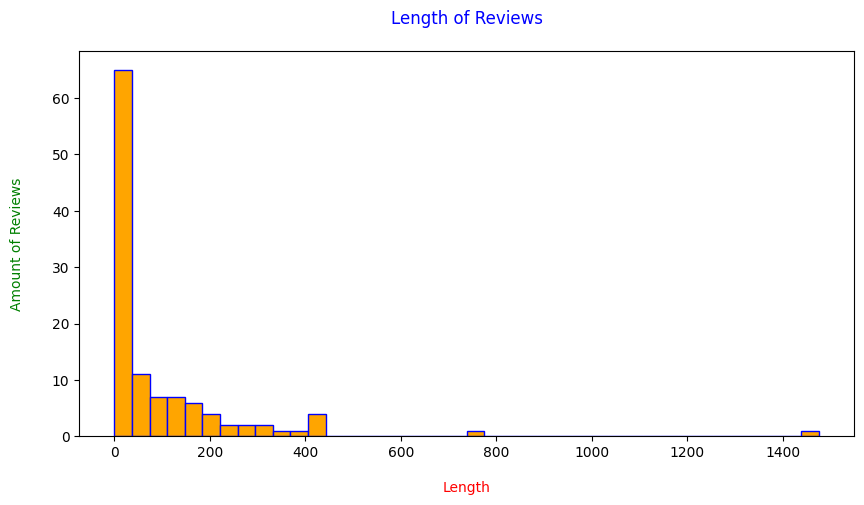

In [25]:
dataset["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [26]:
dataset["word_counts"] = dataset["review_text"].apply(lambda x: len(str(x).split()))

<ipython-input-26-832a4e663223>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["word_counts"] = dataset["review_text"].apply(lambda x: len(str(x).split()))


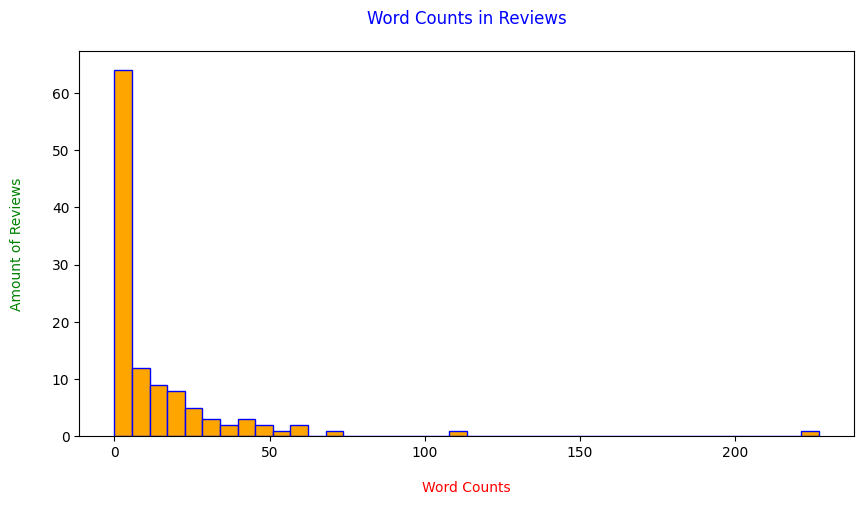

In [27]:
dataset["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [28]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [29]:
Positive = dataset[dataset["sentiment"] == "Positive"].dropna()
Neutral = dataset[dataset["sentiment"] == "Neutral"].dropna()
Negative = dataset[dataset["sentiment"] == "Negative"].dropna()

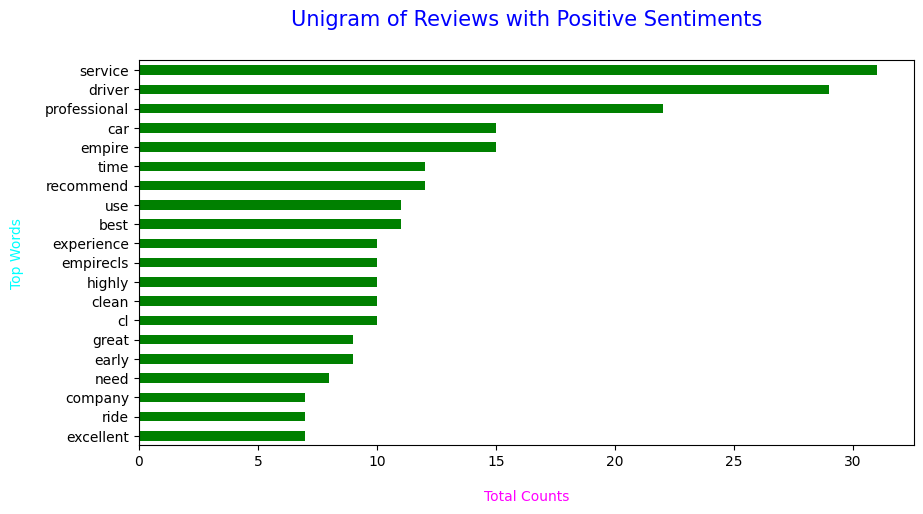

In [30]:
words = Gram_Analysis(Positive["review_text"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

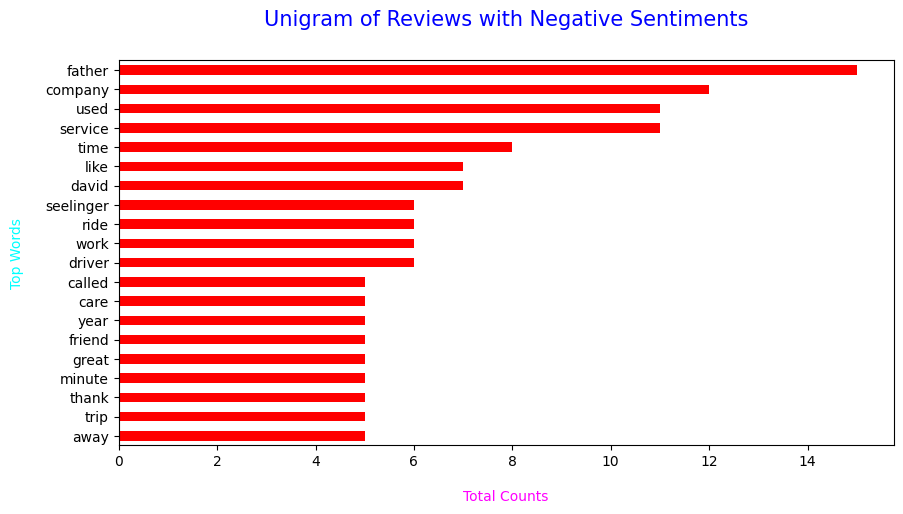

In [31]:
words = Gram_Analysis(Negative["review_text"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

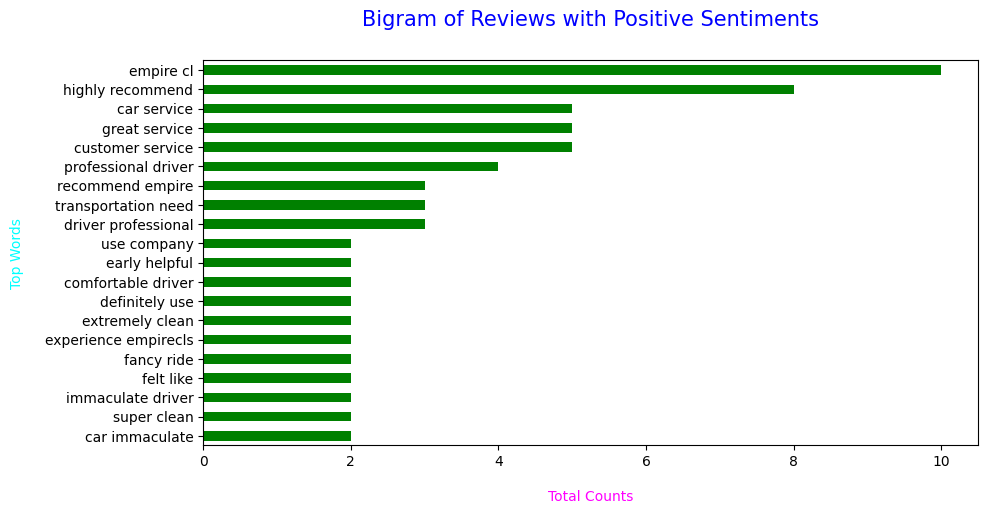

In [32]:

# Finding Bigram
words = Gram_Analysis(Positive["review_text"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

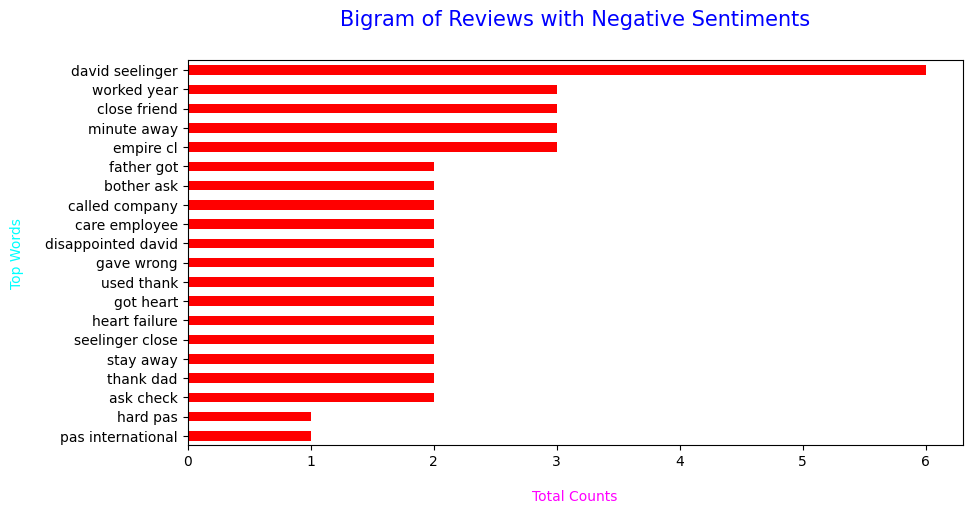

In [33]:

# Finding Bigram
words = Gram_Analysis(Negative["review_text"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

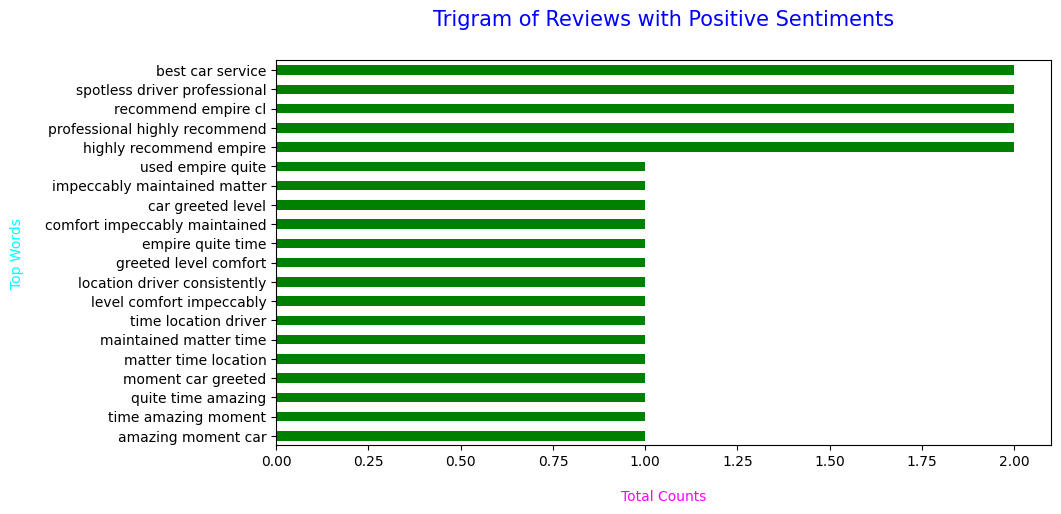

In [34]:
words = Gram_Analysis(Positive["review_text"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

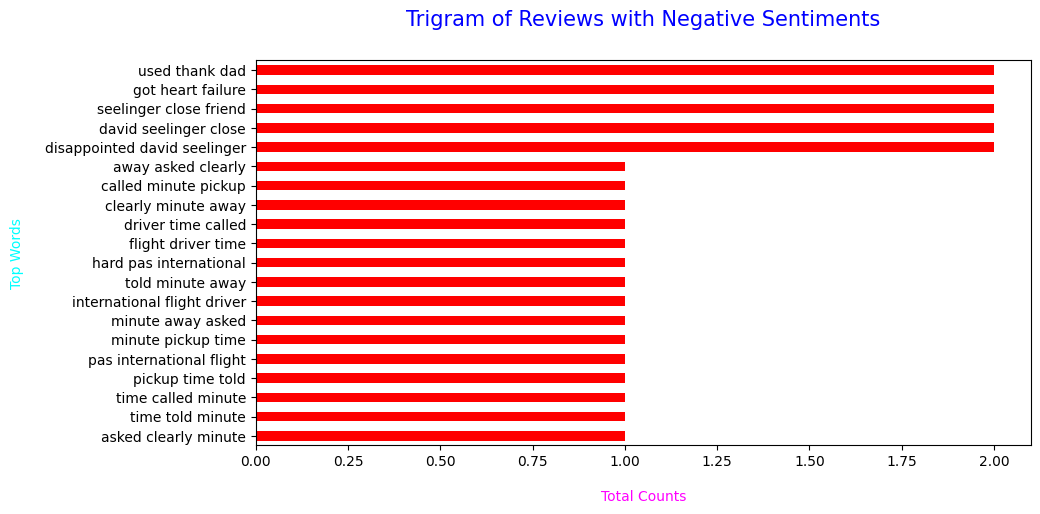

In [35]:
words = Gram_Analysis(Negative["review_text"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

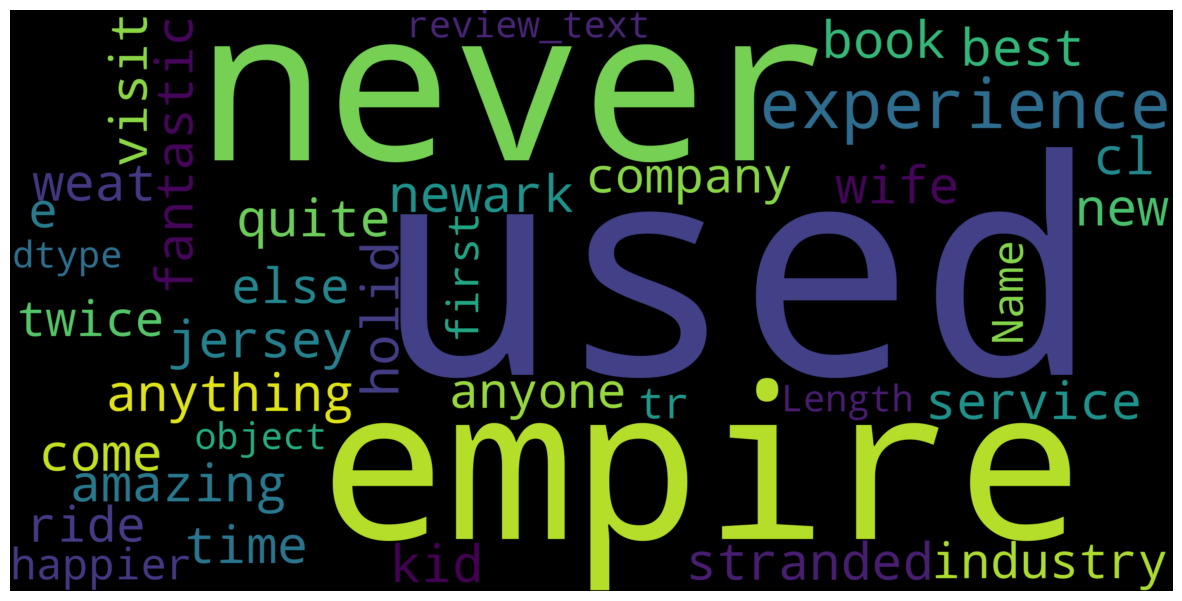

In [36]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["review_text"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

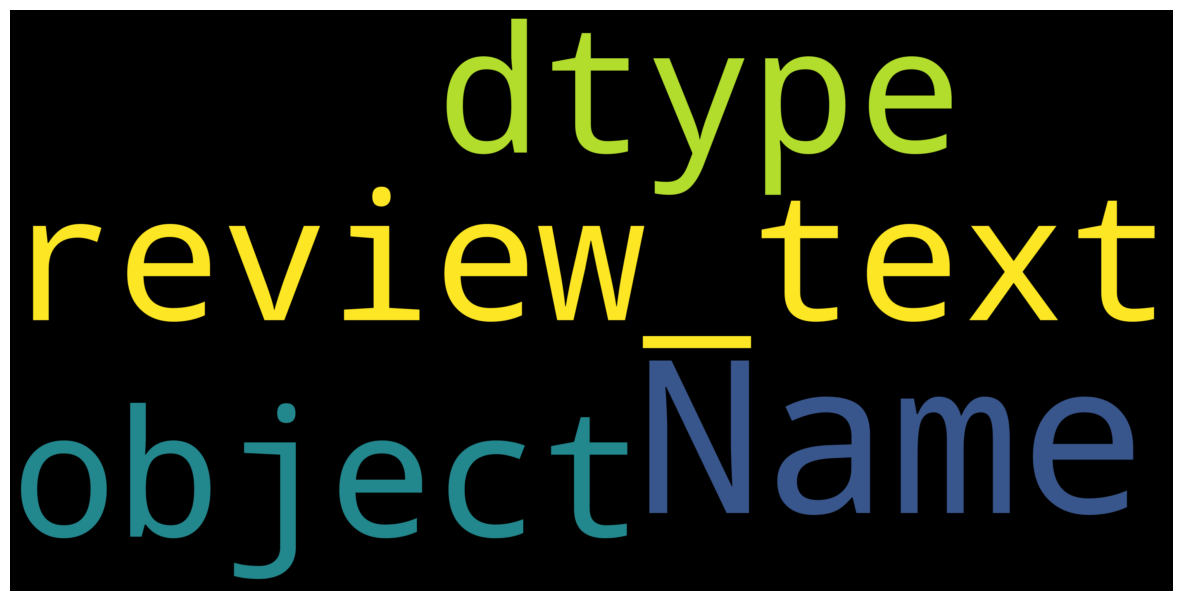

In [37]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["review_text"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


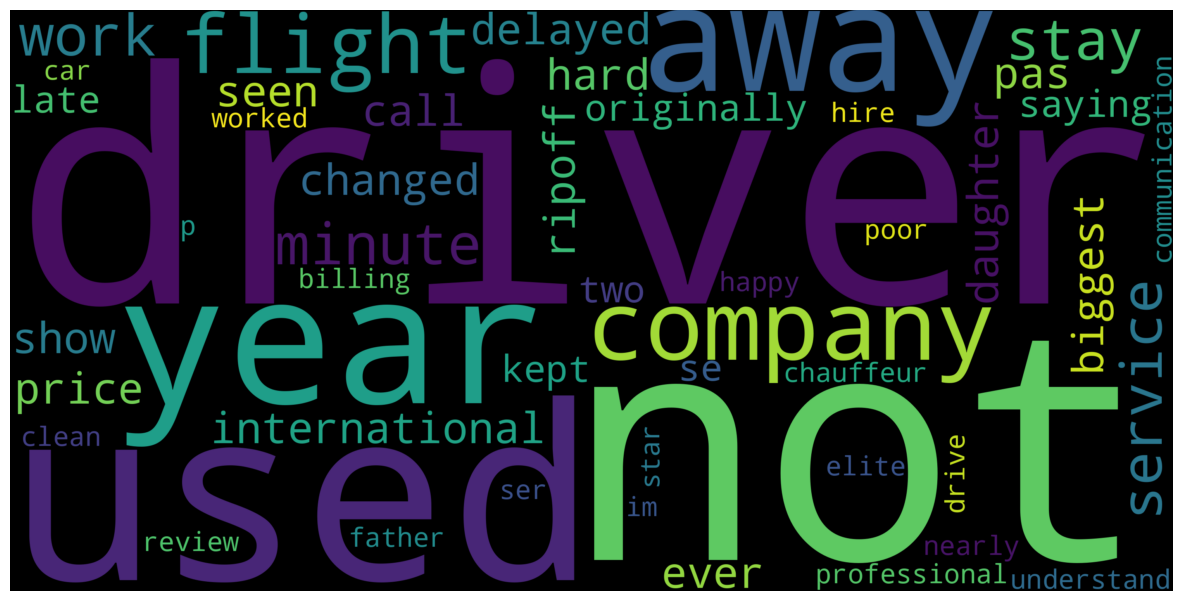

In [38]:

wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["review_text"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()